<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72549 entries, 0 to 72548
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           72549 non-null  int64  
 1   telephely_azonosito                  72549 non-null  int64  
 2   X.x                                  72549 non-null  int64  
 3   sorszam_diak                         72549 non-null  int64  
 4   oszt_letszam                         72549 non-null  int64  
 5   tanarok_szama                        67830 non-null  float64
 6   osztid                               72549 non-null  int64  
 7   tipus                                72549 non-null  int64  
 8   mkod_th                              72549 non-null  int64  
 9   teltip7_th                           72549 non-null  int64  
 10  ft_csop                              72549 non-null  int64  
 11  matek_8                     

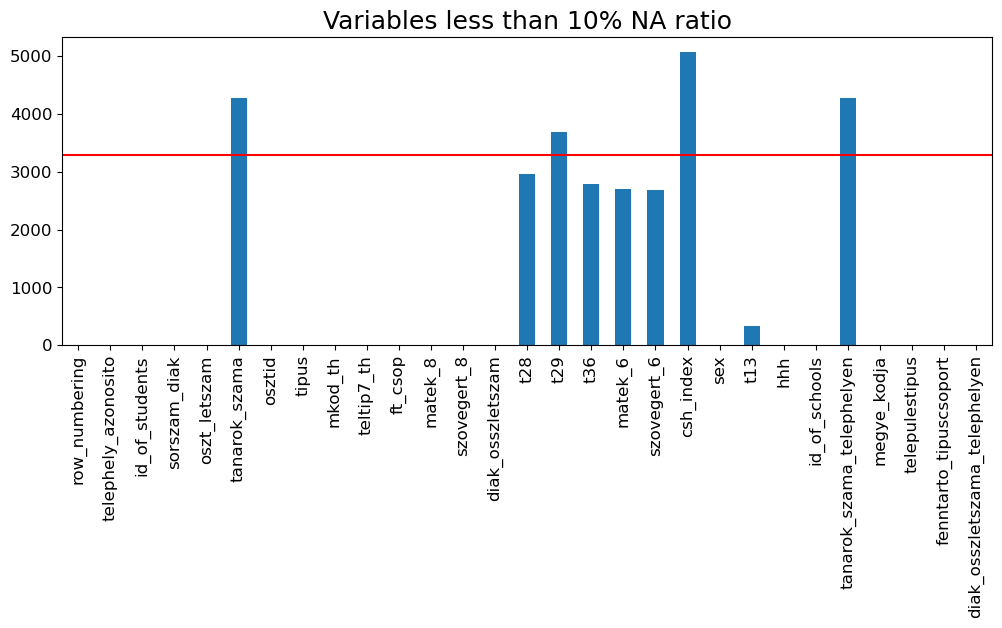

Available features after filtering NAs:
-----
row_numbering
telephely_azonosito
id_of_students
sorszam_diak
oszt_letszam
tanarok_szama
osztid
tipus
mkod_th
teltip7_th
ft_csop
matek_8
szovegert_8
diak_osszletszam
t28
t29
t36
matek_6
szovegert_6
csh_index
sex
t13
hhh
id_of_schools
tanarok_szama_telephelyen
megye_kodja
telepulestipus
fenntarto_tipuscsoport
diak_osszletszama_telephelyen
-----
61516
61516
65795
65795
65795
65795
65795
2381
2381
20
20
7
7
5
5
1
8


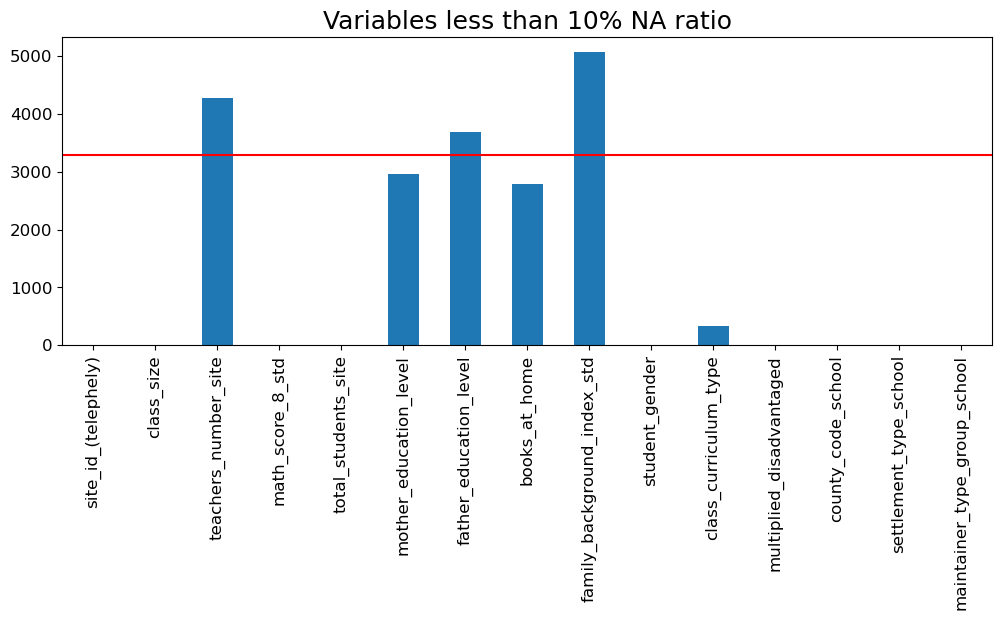

site_id_(telephely)                int64
class_size                         Int64
teachers_number_site             float64
math_score_8_std                 float64
total_students_site                Int64
mother_education_level          category
father_education_level          category
books_at_home                   category
family_background_index_std      float64
student_gender                  category
class_curriculum_type           category
multiplied_disadvantaged        category
county_code_school              category
settlement_type_school          category
maintainer_type_group_school    category
dtype: object

 mother_education_level
mother_education_level
secondary_with_matura    17920
apprenticeship_school    11629
college                  10284
primary_school            7852
university                4719
vocational_school         3133
less_than_primary         1053
Name: count, dtype: int64

 father_education_level
father_education_level
apprenticeship_school    20947
s

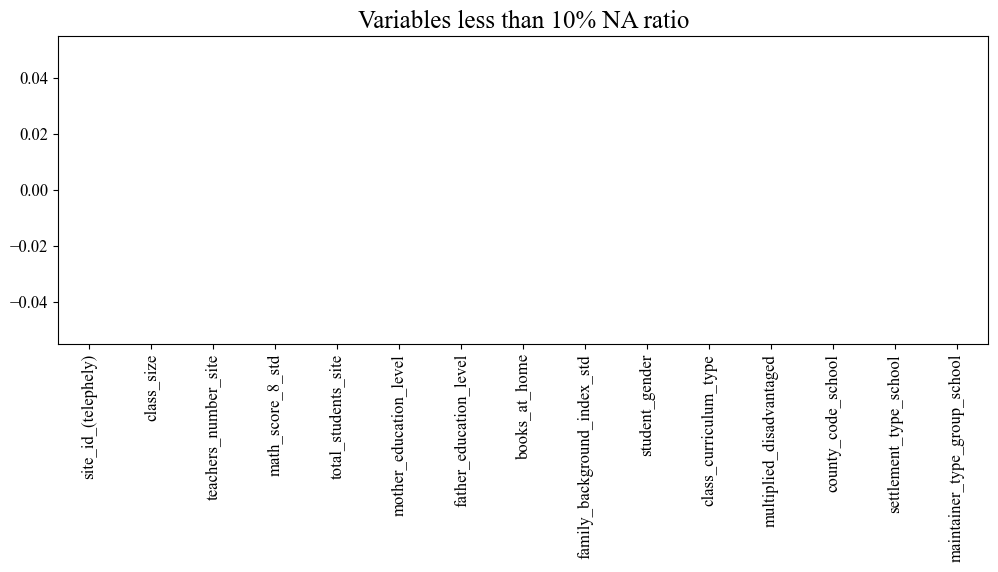

<class 'pandas.core.frame.DataFrame'>
Index: 56569 entries, 0 to 72467
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   site_id_(telephely)           56569 non-null  int64   
 1   class_size                    56569 non-null  Int64   
 2   math_score_8_std              56569 non-null  float64 
 3   mother_education_level        56569 non-null  category
 4   father_education_level        56569 non-null  category
 5   books_at_home                 56569 non-null  category
 6   family_background_index_std   56569 non-null  float64 
 7   student_gender                56569 non-null  category
 8   class_curriculum_type         56569 non-null  category
 9   multiplied_disadvantaged      56569 non-null  category
 10  county_code_school            56569 non-null  category
 11  settlement_type_school        56569 non-null  category
 12  maintainer_type_group_school  56569 non-null  categ

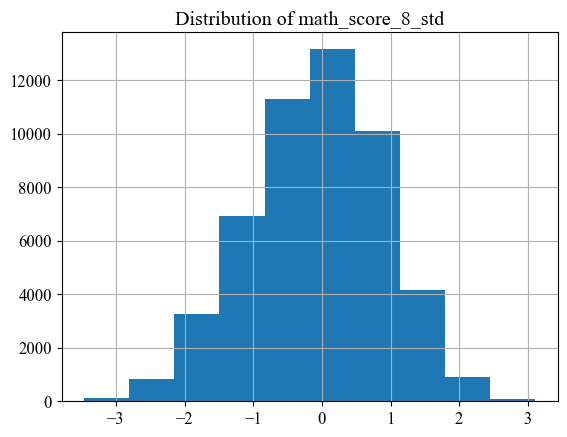

Numeric columns: 5
Categorical columns (ignored later): 8
Remaining NaNs (should be 0): 0
X_num shape: (50912, 5)
Shapes — original: (40729, 5) | scaled: (40729, 5)


In [1]:
# importing libraries
!pip install pytictoc
import pytictoc
from pytictoc import TicToc
t = TicToc() #create instance of class for timer
t.tic() #Start timer


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Imports, helpers, and a single train/test split wrapper ----
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
import importlib
import subprocess
import sys

def install_and_import(package, import_name=None):
    """
    Try to import a package. If it's not installed, install it via pip and import again.
    """
    if import_name is None:
        import_name = package

    try:
        return importlib.import_module(import_name)
    except ImportError:
        print(f"{import_name} not found, installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        return importlib.import_module(import_name)


# core libs
pd = install_and_import("pandas")
np = install_and_import("numpy")
plt = install_and_import("matplotlib.pyplot", "matplotlib.pyplot")

#  seed
seed = 314 + 133 + 76223 + 3 + 5
np.random.seed(seed)

# sklearn model_selection only once
sklearn_model_selection = install_and_import("sklearn.model_selection", "sklearn.model_selection")
train_test_split = sklearn_model_selection.train_test_split

# shared target_col+ split params
target_col = "math_score_8_std"
split_random_state = seed
TEST_SIZE = 0.2


def split_X_y(df, target_col: str = target_col):
    """
    Convenience function to split a DataFrame into X and y.
    """
    y = df[target_col]
    X = df.drop(columns=[target_col])
    return X, y


def simple_train_test_split(X, y,
                            test_size: float = TEST_SIZE,
                            random_state: int = split_random_state):
    """
    Wrapper around sklearn's train_test_split with shared defaults.
    Returns X_train, X_test, y_train, y_test.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


# prepare_data.py

# working directory check
# %pwd

# data read
data = pd.read_csv('../data/okm_diak_adat.csv', low_memory=False)
data.head()

data.info()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Data base manipulation
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

# renaming some columns, based on the provided file description 
data.rename(columns={
    'Unnamed: 0': 'row_numbering',
    'X.x': 'id_of_students',
    'X.y': 'id_of_schools'
}, inplace=True)

# correlation between our two independent variables
print("Correlation between maths_8 points and reading_8 points:", data['matek_8'].corr(data['szovegert_8']))
print("Correlation between maths_8 points and maths_6 points:", data['matek_8'].corr(data['matek_6']))
print("Correlation between reading_8 points and reading_6 points:", data['szovegert_8'].corr(data['szovegert_6']))

# there are a lot of variables with missing values
# threshold for the proportion of missing values above which we remove the variable
na_ratio = 0.1

# theoretical NA proportion above which dropping a variable may be worth considering
percentage_of_NA = 0.05

# data read once again so rerunning this chunk with different NA ratio wont influence the database
data = pd.read_csv('../data/okm_diak_adat.csv', low_memory=False)
data.rename(columns={
    'Unnamed: 0': 'row_numbering',
    'X.x': 'id_of_students',
    'X.y': 'id_of_schools'
}, inplace=True)

# omitting all NAs in our independent variables
data = data.dropna(subset=['matek_8', "szovegert_8"])

# dropping columns from df where the proportion of missing values (NaN) is higher than 'ratio' (default: 0.60 = 60%).
def remove_highnan(df, ratio):
    for i in df.columns:
        if df[i].isnull().mean() > ratio:
            df.drop(i, axis=1, inplace=True)  # if its more than ratio of NAs, drop the column

remove_highnan(data, na_ratio)

print(f"{percentage_of_NA:.0%} of the dataframe length (red line):", round(len(data)*percentage_of_NA, 1),
      "(just for help deciding which variables to use)")
print()
data.isnull().sum().plot(kind='bar', fontsize=12, figsize=(12, 4))
plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)
plt.axhline(y=len(data)*percentage_of_NA, color='red')
plt.show()

print("Available features after filtering NAs:")
print("-----")
for col in data.columns:
    print(col)
print("-----")

# filtering for duplicates and not useful features
# are the 2 number of teacher features equal?
tmp = data.dropna(subset=["tanarok_szama", "tanarok_szama_telephelyen"])
print(len(tmp["tanarok_szama"] == tmp["tanarok_szama_telephelyen"]))
print(sum(tmp["tanarok_szama"] == tmp["tanarok_szama_telephelyen"]))
# all rows are the same, then drop one

# are the 2 number of student features equal?
tmp = data.dropna(subset=["diak_osszletszam", "diak_osszletszama_telephelyen"])
print(len(tmp["diak_osszletszam"] == tmp["diak_osszletszama_telephelyen"]))
print(sum(tmp["diak_osszletszam"] == tmp["diak_osszletszama_telephelyen"]))
# all rows are the same, then drop one

# NOTE: fixed typo 'ata' -> 'data'
data.drop(columns=["diak_osszletszama_telephelyen",
                   "tanarok_szama_telephelyen"],
          inplace=True)

# renaming the columns
data.rename(columns={
    # already partly English but make them consistent
    'row_numbering': 'row_number',
    'id_of_students': 'student_id',
    'id_of_schools': 'school_id',

    # IDs, structure
    'telephely_azonosito': 'site_id_(telephely)',      # school site identifier (campus/site)
    'sorszam_diak': 'student_serial_number',           # internal student serial number
    'osztid': 'class_id',
    'oszt_letszam': 'class_size',

    # teacher & student counts
    'tanarok_szama': 'teachers_number_site',           # number of teachers at the site
    'diak_osszletszam': 'total_students_site',         # total number of students at the site

    # geography / school context
    'mkod_th': 'county_code_site',                     # county code at site level
    'megye_kodja': 'county_code_school',               # county code at school level
    'teltip7_th': 'settlement_type_site',              # settlement type of the site
    'telepulestipus': 'settlement_type_school',        # settlement type of the school
    'ft_csop': 'maintainer_type_group',                # maintainer type group (code)
    'fenntarto_tipuscsoport': 'maintainer_type_group_school',  # maintainer type group at school level
    'tipus': 'school_type',                            # type of school

    # test scores (standardized)
    'matek_8': 'math_score_8_std',                     # standardized math score, grade 8
    'szovegert_8': 'reading_score_8_std',              # standardized reading score, grade 8
    'matek_6': 'math_score_6_std',                     # standardized math score, grade 6
    'szovegert_6': 'reading_score_6_std',              # standardized reading score, grade 6

    # family background
    't28': 'mother_education_level',                   # mother’s or female guardian’s highest education
    't29': 'father_education_level',                   # father’s or male guardian’s highest education
    't36': 'books_at_home',                            # number of books at home (categories)
    'csh_index': 'family_background_index_std',        # standardized family background index

    # student-level attributes
    'sex': 'student_gender',                           # student gender (coded)
    't13': 'class_curriculum_type',                    # type of curriculum of the student’s class
    'hhh': 'multiplied_disadvantaged'                  # student is multiply disadvantaged (binary)
}, inplace=True)

data.head()

# filtering again for duplicates and not useful features
# we dont need these (dont have useful information )
print(data['row_number'].nunique())

print(data['student_id'].nunique())
print(data['student_serial_number'].nunique())

print(data['school_id'].nunique())
print(data['site_id_(telephely)'].nunique())

print(data['county_code_site'].nunique())
print(data['county_code_school'].nunique())

print(data['settlement_type_site'].nunique())
print(data['settlement_type_school'].nunique())

print(data['maintainer_type_group'].nunique())
print(data['maintainer_type_group_school'].nunique())

print(data['school_type'].nunique())  # no useful information

print(data['class_id'].nunique())  # also just an unnecessary feature

# removing the unnecessary features
cols_to_drop = [
    'row_number',            # row number 
    'student_id',            # student_id
    'student_serial_number', # student_serial_number
    'school_id',             # school_id
    'county_code_site',      # county_code at site level
    'settlement_type_site',  # settlement_type_site
    'maintainer_type_group', # maintainer_type_group
    'school_type',           # school_type
    'class_id',              # class_id
    'reading_score_8_std',   # we dont use these scores, since we focusing on 8th grade maths
    'math_score_6_std',
    'reading_score_6_std',
]

data = data.drop(columns=cols_to_drop, errors='ignore')
data.isnull().sum().plot(kind='bar', fontsize=12, figsize=(12, 4))
plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)
plt.axhline(y=len(data)*percentage_of_NA, color='red')
plt.show()

# saving the plot
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12   # base font size

data.isnull().sum().plot(kind='bar', fontsize=12, figsize=(12, 4))

plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)

# extra comment inside the plot
plt.text(
    x=-0.3,
    y=len(data)*percentage_of_NA + 1650,
    s='Blue bars = number of NAs',
    ha='left',
    fontsize=12,              # comment font size
    fontfamily='Times New Roman'
)

# saving
plt.savefig('../figures/na_plot.png', dpi=300, bbox_inches='tight')
plt.close()

data.head()

# dropping NAs
data = data.dropna()

# manual type specification for each variable
dtype_spec = {
    "site_id_telephely":          "category",  # NOTE: column name in data is 'site_id_(telephely)' in rename
    "class_size":                   "int",
    "teachers_number_site":         "float",
    "math_score_8_std":             "float",
    "total_students_site":          "int",
    "mother_education_level":       "category",
    "father_education_level":       "category",
    "books_at_home":                "category",
    "family_background_index_std":  "float",
    "student_gender":               "category",
    "class_curriculum_type":        "category",
    "multiplied_disadvantaged":     "category",
    "county_code_school":           "category",
    "settlement_type_school":       "category",
    "maintainer_type_group_school": "category"
}

for col, kind in dtype_spec.items():
    if col not in data.columns:
        print(f"Warning: column '{col}' not found in data")
        continue

    if kind == "category":
        data[col] = data[col].astype("category")

    elif kind == "int":
        data[col] = pd.to_numeric(data[col], errors="coerce").astype("Int64")

    elif kind == "float":
        data[col] = pd.to_numeric(data[col], errors="coerce")

# quick check
print(data.dtypes)

data["books_at_home"].unique()  # check is there is NA -> no NA

edu_map = {
    1: "less_than_primary",
    2: "primary_school",
    3: "vocational_school",
    4: "apprenticeship_school",
    5: "secondary_with_matura",
    6: "college",
    7: "university"
}

books_map = {
    1: "0_50",
    2: "around_50",
    3: "up_to_150",
    4: "up_to_300",
    5: "300_600",
    6: "600_1000",
    7: "more_than_1000"
}

gender_map = {
    0: "boy",
    1: "girl"
}

curriculum_map = {
    1: "normal",
    2: "bilingual",
    3: "specialized",
    6: "nationality"
}

hhh_map = {
    0: "no",
    1: "yes"
}

settlement_map = {
    1: "Budapest",
    2: "county_seat",
    3: "town",
    4: "village_under_5000",
    5: "village_2000_5000",
    6: "village_1000_2000",
    7: "village_under_1000"
}

maintainer_map = {
    2: "local_municipality",
    3: "central_government_state",
    4: "church",
    5: "foundation_private",
    6: "other"
}
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Apply maps ----
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

# mother & father education
for col in ["mother_education_level", "father_education_level"]:
    if col in data.columns:
        tmp = pd.to_numeric(data[col], errors="coerce")
        data[col] = tmp.map(edu_map).astype("category")

# books at home
if "books_at_home" in data.columns:
    tmp = pd.to_numeric(data["books_at_home"], errors="coerce")
    data["books_at_home"] = tmp.map(books_map).astype("category")

# student gender
if "student_gender" in data.columns:
    tmp = pd.to_numeric(data["student_gender"], errors="coerce")
    data["student_gender"] = tmp.map(gender_map).astype("category")

# class curriculum type
if "class_curriculum_type" in data.columns:
    tmp = pd.to_numeric(data["class_curriculum_type"], errors="coerce")
    data["class_curriculum_type"] = tmp.map(curriculum_map).astype("category")

# multiplied_disadvantaged (hhh)
if "multiplied_disadvantaged" in data.columns:
    tmp = pd.to_numeric(data["multiplied_disadvantaged"], errors="coerce")
    data["multiplied_disadvantaged"] = tmp.map(hhh_map).astype("category")

# settlement type of school
if "settlement_type_school" in data.columns:
    tmp = pd.to_numeric(data["settlement_type_school"], errors="coerce")
    data["settlement_type_school"] = tmp.map(settlement_map).astype("category")

# maintainer type group at school level
if "maintainer_type_group_school" in data.columns:
    tmp = pd.to_numeric(data["maintainer_type_group_school"], errors="coerce")
    data["maintainer_type_group_school"] = tmp.map(maintainer_map).astype("category")

# county_code_school: keep as categorical codes
if "county_code_school" in data.columns:
    data["county_code_school"] = data["county_code_school"].astype("category")

for c in ["mother_education_level", "father_education_level",
          "books_at_home", "student_gender",
          "class_curriculum_type", "multiplied_disadvantaged",
          "settlement_type_school", "maintainer_type_group_school"]:
    if c in data.columns:
        print("\n", c)
        print(data[c].value_counts(dropna=False))

# descriptive stats for numerical features 
num_data = data.select_dtypes(include=[np.number])

desc = num_data.describe().T.round(2)
print(desc)

# filter those rows where the teacher and student number are zero
data = data[~((data['total_students_site'] == 0) |
              (data['teachers_number_site'] == 0))]

len(data)  # 56590 -> 56569 21 obs

data.isnull().sum().plot(kind='bar', fontsize=12, figsize=(12, 4))
plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)
plt.show()

# creating a student/teacher ratio
data["student_teacher_ratio"] = data["total_students_site"] / data["teachers_number_site"]

# drop the original columns
data = data.drop(columns=["total_students_site", "teachers_number_site"])

data.info()
data.head()


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Data manipulation
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

# 90% random sample for analysis
filtered_data_anal = data.sample(frac=0.9, random_state=seed)

# remaining 10% for final evaluation
filtered_data_eval = data.drop(filtered_data_anal.index)

# write to CSVs
filtered_data_anal.to_csv('../data/filtered_data_anal.csv', index=False)
filtered_data_eval.to_csv('../data/filtered_data_eval.csv', index=False)


# linear_models.py

from math import sqrt
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

# loading the data
filtered_data_anal = pd.read_csv("../data/filtered_data_anal.csv")
filtered_data_anal.head()
print(filtered_data_anal.info())

y = filtered_data_anal[target_col]

# X: all other variables except the target
X = filtered_data_anal.drop(columns=[target_col])

# looking at the data a bit
plt.figure()
y.hist()
plt.title("Distribution of math_score_8_std")  # standardized approx normal
plt.show()

# Checking numeric vs categorical features
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numeric columns:", len(num_cols))
print("Categorical columns (ignored later):", len(cat_cols))

print("Remaining NaNs (should be 0):", int(X.isna().sum().sum()))

# numeric-only features
X_num = X[num_cols].copy()
print("X_num shape:", X_num.shape)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Train/test split via helper ----
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
X_tr, X_te, y_tr, y_te = simple_train_test_split(X_num, y)

# y does not need to be scaled because it is standardized

# Standardize features
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_te_s = scaler.transform(X_te)

print("Shapes — original:", X_tr.shape,
      "| scaled:", X_tr_s.shape)


LinearRegression — Test R^2: 0.252 | RMSE: 0.831
Baseline RMSE (predict 0): 0.9649224834442532
Baseline R^2 (predict 0): -0.0075295032081190705
Best lambda by 5-fold CV (min RMSE): 1000.0
Test R^2 score for RidgeCV model: 0.25180520990465083
Test RMSE score for RidgeCV model: 0.8315165156457244


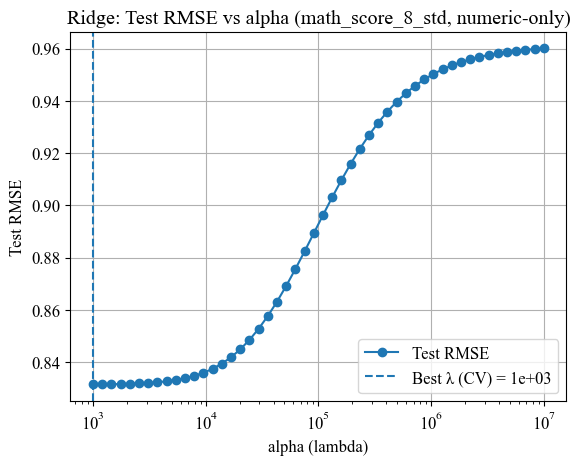

Best lambda by 5-fold CV (min RMSE, Lasso): 0.002329951810515372
Test R^2 score for LassoCV model: 0.25194780740064016
Test RMSE score for LassoCV model: 0.8314372730308712


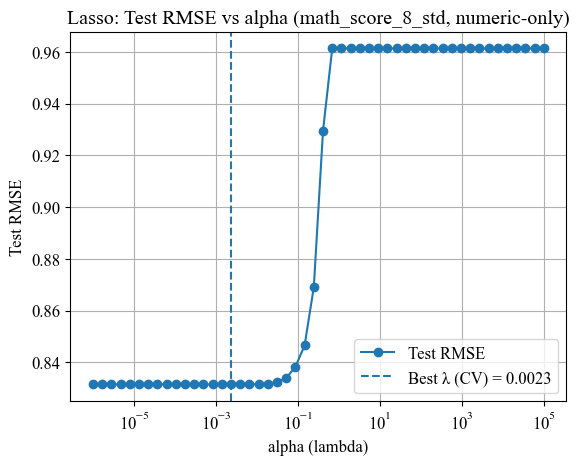

Best lambda by 5-fold CV (min RMSE, Lasso): 0.01
Test R^2 score for LassoCV model: 0.25182499513105805
Test RMSE score for LassoCV model: 0.8315055212820207


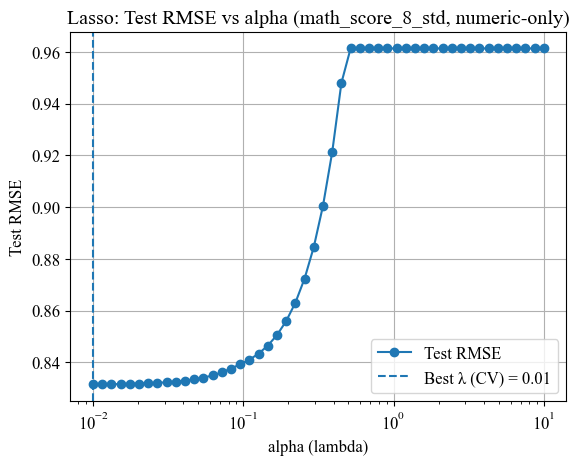

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Plain linear regression ----
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
lin = LinearRegression().fit(X_tr_s, y_tr)
y_lin = lin.predict(X_te_s)

print(f"LinearRegression — Test R^2: {r2_score(y_te, y_lin):.3f} | "
      f"RMSE: {np.sqrt(mean_squared_error(y_te, y_lin)):.3f}")

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Baseline regression: always predict 0
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

# Baseline predictions (all zeros)
y_pred_baseline = np.zeros_like(y_te)

# Baseline metrics
mse_baseline = mean_squared_error(y_te, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_te, y_pred_baseline)

print("Baseline RMSE (predict 0):", rmse_baseline)
print("Baseline R^2 (predict 0):", r2_baseline)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Ridge regression
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
lambda_ridge = np.logspace(3, 7, 50)

kf = KFold(
    n_splits=5,
    shuffle=True,
    random_state=76678
)

ridge_cv = RidgeCV(
    alphas=lambda_ridge,
    cv=kf,
    scoring="neg_mean_squared_error"
)

ridge_cv.fit(X_tr_s, y_tr)

best_lambda = ridge_cv.alpha_
print("Best lambda by 5-fold CV (min RMSE):", best_lambda)

# evaluate on test set
y_hat_test = ridge_cv.predict(X_te_s)

R2_test = r2_score(y_te, y_hat_test)
RMSE_test = sqrt(mean_squared_error(y_te, y_hat_test))

print("Test R^2 score for RidgeCV model:", R2_test)
print("Test RMSE score for RidgeCV model:", RMSE_test)

# RMSE vs lambda on test set
rows = []
for l in lambda_ridge:
    ridge = Ridge(alpha=l)
    ridge.fit(X_tr_s, y_tr)
    y_hat = ridge.predict(X_te_s)
    rows.append({
        "alpha": l,
        "R2_test": r2_score(y_te, y_hat),
        "RMSE_test": sqrt(mean_squared_error(y_te, y_hat))
    })

res_ridge = pd.DataFrame(rows)

plt.figure()
plt.semilogx(res_ridge["alpha"], res_ridge["RMSE_test"], marker="o", label="Test RMSE")
plt.axvline(best_lambda, linestyle="--", label=f"Best λ (CV) = {best_lambda:.2g}")
plt.xlabel("alpha (lambda)")
plt.ylabel("Test RMSE")
plt.title("Ridge: Test RMSE vs alpha (math_score_8_std, numeric-only)")
plt.legend()
plt.grid(True)

plt.savefig('../figures/ridge_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Lasso regression -----
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

lambda_lasso = np.logspace(-6, 5, 50)

lasso_cv = LassoCV(
    alphas=lambda_lasso,
    cv=5,
    max_iter=1000,
    tol=1e-5,
    random_state=76678
)
lasso_cv.fit(X_tr_s, y_tr)

best_lambda_lasso = lasso_cv.alpha_
print("Best lambda by 5-fold CV (min RMSE, Lasso):", best_lambda_lasso)

y_hat_test_lasso = lasso_cv.predict(X_te_s)

R2_test_lasso = r2_score(y_te, y_hat_test_lasso)
RMSE_test_lasso = sqrt(mean_squared_error(y_te, y_hat_test_lasso))

print("Test R^2 score for LassoCV model:", R2_test_lasso)
print("Test RMSE score for LassoCV model:", RMSE_test_lasso)

rows = []
for l in lambda_lasso:
    lasso = Lasso(alpha=l, max_iter=1000, tol=1e-5)
    lasso.fit(X_tr_s, y_tr)
    y_hat = lasso.predict(X_te_s)
    rows.append({
        "alpha": l,
        "R2_test": r2_score(y_te, y_hat),
        "RMSE_test": sqrt(mean_squared_error(y_te, y_hat))
    })

res_lasso = pd.DataFrame(rows)

plt.figure()
plt.semilogx(res_lasso["alpha"], res_lasso["RMSE_test"], marker="o", label="Test RMSE")
plt.axvline(best_lambda_lasso, linestyle="--", label=f"Best λ (CV) = {best_lambda_lasso:.2g}")
plt.xlabel("alpha (lambda)")
plt.ylabel("Test RMSE")
plt.title("Lasso: Test RMSE vs alpha (math_score_8_std, numeric-only)")
plt.legend()
plt.grid(True)
plt.savefig('../figures/lasso2_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Lasso regression: narrower grid -----
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

lambda_lasso = np.logspace(-2, 1, 50)

lasso_cv = LassoCV(
    alphas=lambda_lasso,
    cv=5,
    max_iter=1000,
    tol=1e-5,
    random_state=76678
)
lasso_cv.fit(X_tr_s, y_tr)

best_lambda_lasso = lasso_cv.alpha_
print("Best lambda by 5-fold CV (min RMSE, Lasso):", best_lambda_lasso)

y_hat_test_lasso = lasso_cv.predict(X_te_s)

R2_test_lasso = r2_score(y_te, y_hat_test_lasso)
RMSE_test_lasso = sqrt(mean_squared_error(y_te, y_hat_test_lasso))

print("Test R^2 score for LassoCV model:", R2_test_lasso)
print("Test RMSE score for LassoCV model:", RMSE_test_lasso)

rows = []
for l in lambda_lasso:
    lasso = Lasso(alpha=l, max_iter=1000, tol=1e-5)
    lasso.fit(X_tr_s, y_tr)
    y_hat = lasso.predict(X_te_s)
    rows.append({
        "alpha": l,
        "R2_test": r2_score(y_te, y_hat),
        "RMSE_test": sqrt(mean_squared_error(y_te, y_hat))
    })

res_lasso = pd.DataFrame(rows)

plt.figure()
plt.semilogx(res_lasso["alpha"], res_lasso["RMSE_test"], marker="o", label="Test RMSE")
plt.axvline(best_lambda_lasso, linestyle="--", label=f"Best λ (CV) = {best_lambda_lasso:.2g}")
plt.xlabel("alpha (lambda)")
plt.ylabel("Test RMSE")
plt.title("Lasso: Test RMSE vs alpha (math_score_8_std, numeric-only)")
plt.legend()
plt.grid(True)
plt.savefig('../figures/lasso1_plot.png', dpi=300, bbox_inches='tight')
plt.show()

All regression-related libraries imported successfully!
Training samples: 45255, Test samples: 11314
Best Decision Tree params: {'model__max_depth': 5, 'model__min_samples_leaf': 5}
CV RMSE (mean of best): 0.8464421276091695
Best Random Forest params: {'model__max_depth': 20, 'model__max_features': 0.3, 'model__min_samples_leaf': 5, 'model__n_estimators': 300}
CV RMSE (mean of best): 0.8147824842132941

Decision Tree Test Performance:
RMSE: 0.8338458942415167
R²: 0.24995679234715296
MAE: 0.6649881343587994

Random Forest Test Performance:
RMSE: 0.8017342135167475
R²: 0.30661326730390015
MAE: 0.6366446772014718


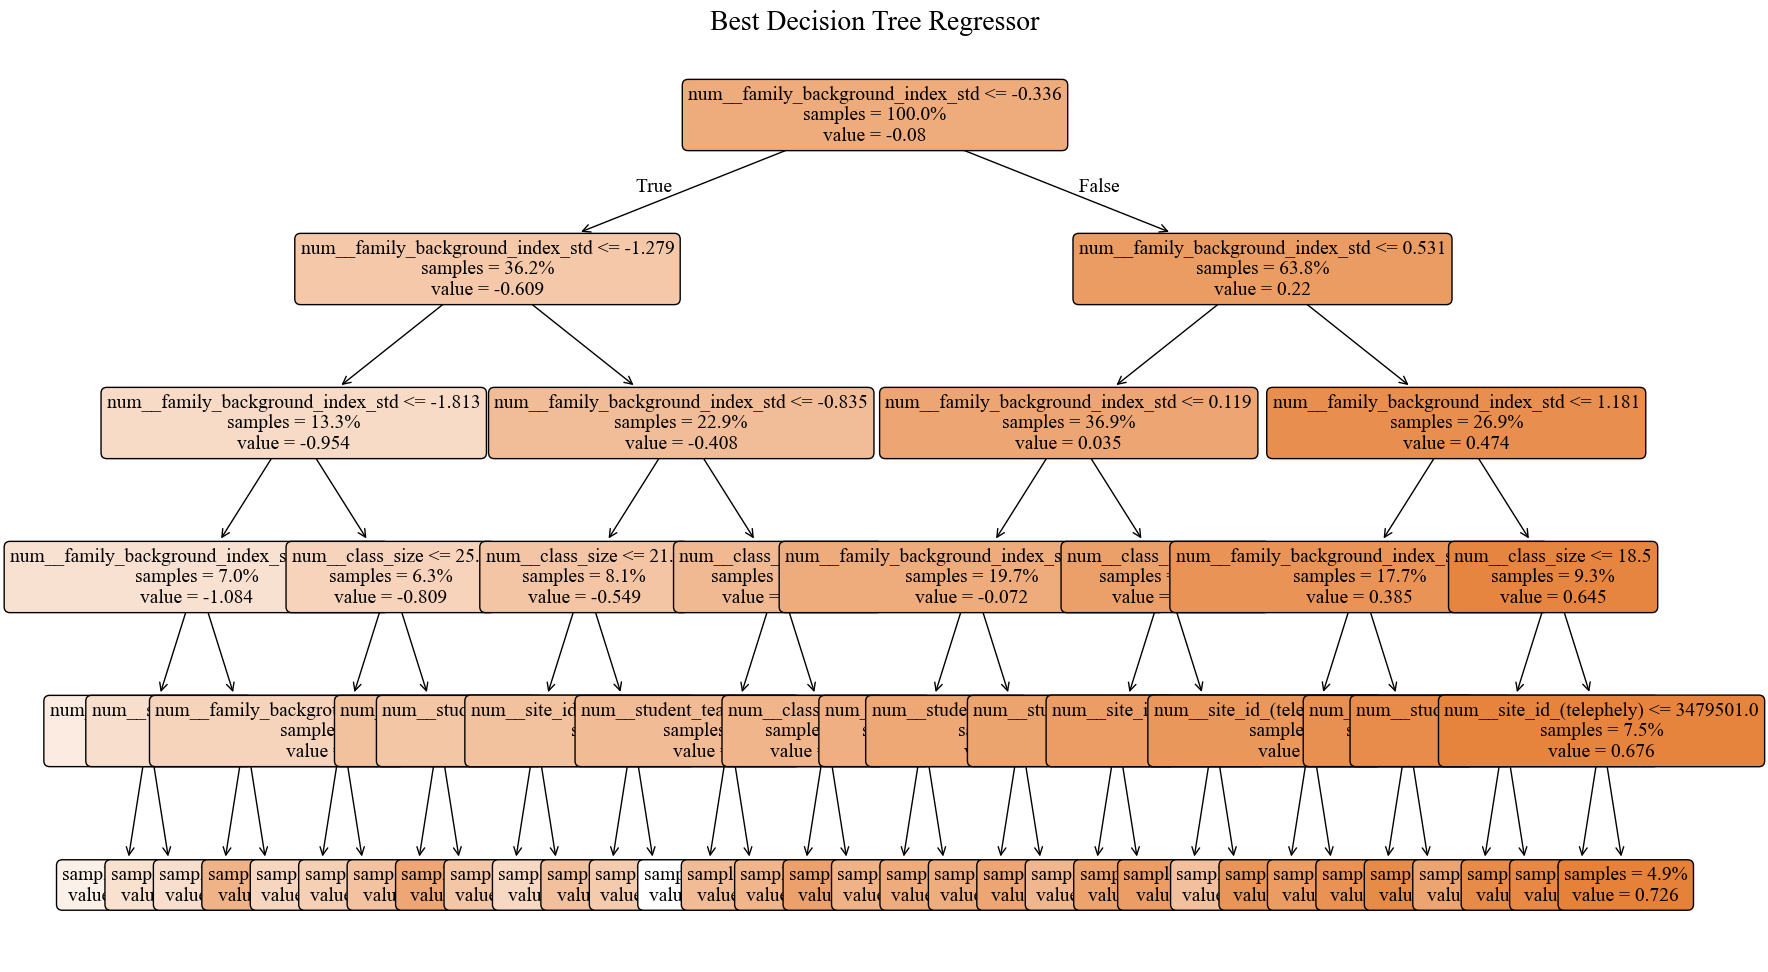

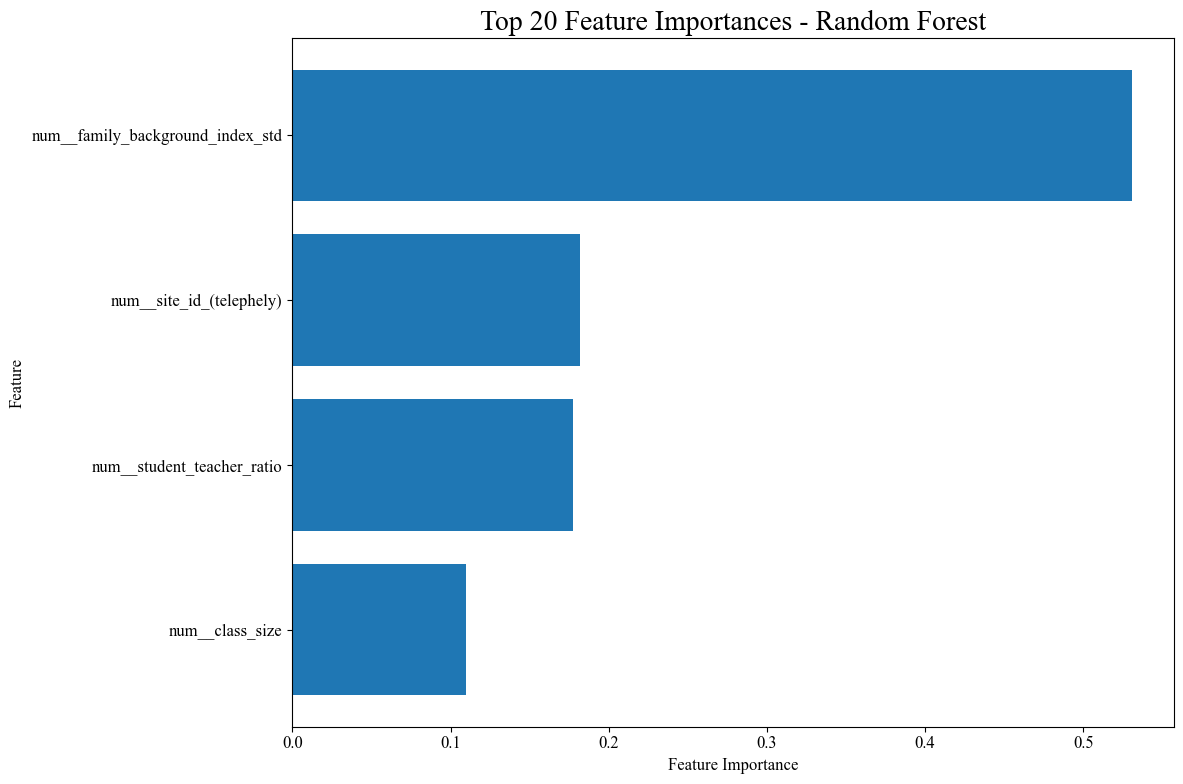

                            feature  importance
2  num__family_background_index_std    0.530694
0          num__site_id_(telephely)    0.181791
3        num__student_teacher_ratio    0.177685
1                   num__class_size    0.109830


In [3]:

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Random forest
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

# Dataset & model selection
from sklearn.model_selection import (
        GridSearchCV, RepeatedKFold
)

# Preprocessing
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# MODELS
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor



print("All regression-related libraries imported successfully!")

# Step 1: Naming the target_colvariable and splitting the data
target_col= "math_score_8_std"

# X, y from shared helper
X, y = split_X_y(data, target_col=target_col)

# 20% hold out of the data for final evaluation (shared helper)
X_train, X_test, y_train, y_test = simple_train_test_split(X, y)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# Step 2: Identifying numeric and categorical features
numeric_features = selector(dtype_include=np.number)(X)
categorical_features = selector(dtype_include=object)(X)

# OneHotEncoder dense
ohe_dense = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Numeric pipeline: impute median
numeric_pipe_tree = Pipeline([
    ('impute', SimpleImputer(strategy='median'))
])

# Categorical pipeline: impute most frequent + one-hot encode
categorical_pipe_tree = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', ohe_dense)
])

# Full preprocessor for tree models
preprocess_for_tree = ColumnTransformer([
    ('num', numeric_pipe_tree, numeric_features),
    ('cat', categorical_pipe_tree, categorical_features)
], remainder='drop', sparse_threshold=0.0)  # dense output

# Step 3: Defining repeated 5-fold cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=76678)

# Step 4: Hyperparameter grids
# Decision tree
param_grid_tree = {
    'model__max_depth': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 5, 20]
}
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# Random forest
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

param_grid_rf = {
    'model__n_estimators': [100, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_leaf': [1, 5],
    'model__max_features': ['sqrt', 'log2', 0.3]
}

# Step 5: Building pipelines
tree_pipe = Pipeline([
    ('preprocess', preprocess_for_tree),
    ('model', DecisionTreeRegressor(random_state=76678))
])

rf_pipe = Pipeline([
    ('preprocess', preprocess_for_tree),
    ('model', RandomForestRegressor(random_state=76678, n_jobs=-1))
])

# Step 6: Grid search CV to find optimal hyperparameters
# TREE
tree_gs = GridSearchCV(
    tree_pipe,
    param_grid_tree,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
tree_gs.fit(X_train, y_train)

print("Best Decision Tree params:", tree_gs.best_params_)
print("CV RMSE (mean of best):", -tree_gs.best_score_)

# RF
rf_gs = GridSearchCV(
    rf_pipe,
    param_grid_rf,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
rf_gs.fit(X_train, y_train)

print("Best Random Forest params:", rf_gs.best_params_)
print("CV RMSE (mean of best):", -rf_gs.best_score_)

# Step 7: Evaluating on held-out test set
# Decision Tree test evaluation
y_pred_tree = tree_gs.best_estimator_.predict(X_test)
print("\nDecision Tree Test Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("R²:", r2_score(y_test, y_pred_tree))
print("MAE:", mean_absolute_error(y_test, y_pred_tree))

# Random Forest test evaluation
y_pred_rf = rf_gs.best_estimator_.predict(X_test)
print("\nRandom Forest Test Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

# Extracting the best Decision Tree model from the GridSearchCV
best_tree_model = tree_gs.best_estimator_.named_steps['model']

plt.rcParams["font.family"] = "Times New Roman"

# Getting feature names after preprocessing
feature_names = tree_gs.best_estimator_.named_steps['preprocess'].get_feature_names_out()

# Plotting the tree
plt.figure(figsize=(20, 12))
plot_tree(
    best_tree_model,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=14,
    proportion=True,
    impurity=False
)
plt.title("Best Decision Tree Regressor", fontsize=20)
plt.show()

# Extracting best Random Forest from GridSearchCV
best_rf_model = rf_gs.best_estimator_.named_steps['model']

# Getting feature names after preprocessing
feature_names = rf_gs.best_estimator_.named_steps['preprocess'].get_feature_names_out()

# Getting feature importances
importances = best_rf_model.feature_importances_

# Creating a DataFrame for easier sorting and plotting
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plotting top 20 features
plt.figure(figsize=(12, 8))
plt.barh(importances_df['feature'][:20][::-1], importances_df['importance'][:20][::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances - Random Forest', fontsize=20)
plt.tight_layout()
plt.show()

print(importances_df)


Target: math_score_8_std
X_train shape for XGBoost: (40729, 13)
X_test shape for XGBoost: (10183, 13)
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.75, 'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.15, 'colsample_bytree': 0.8}
RMSE (XGBoost): 0.7925342808887187
R^2 (XGBoost): 0.3203128901262986


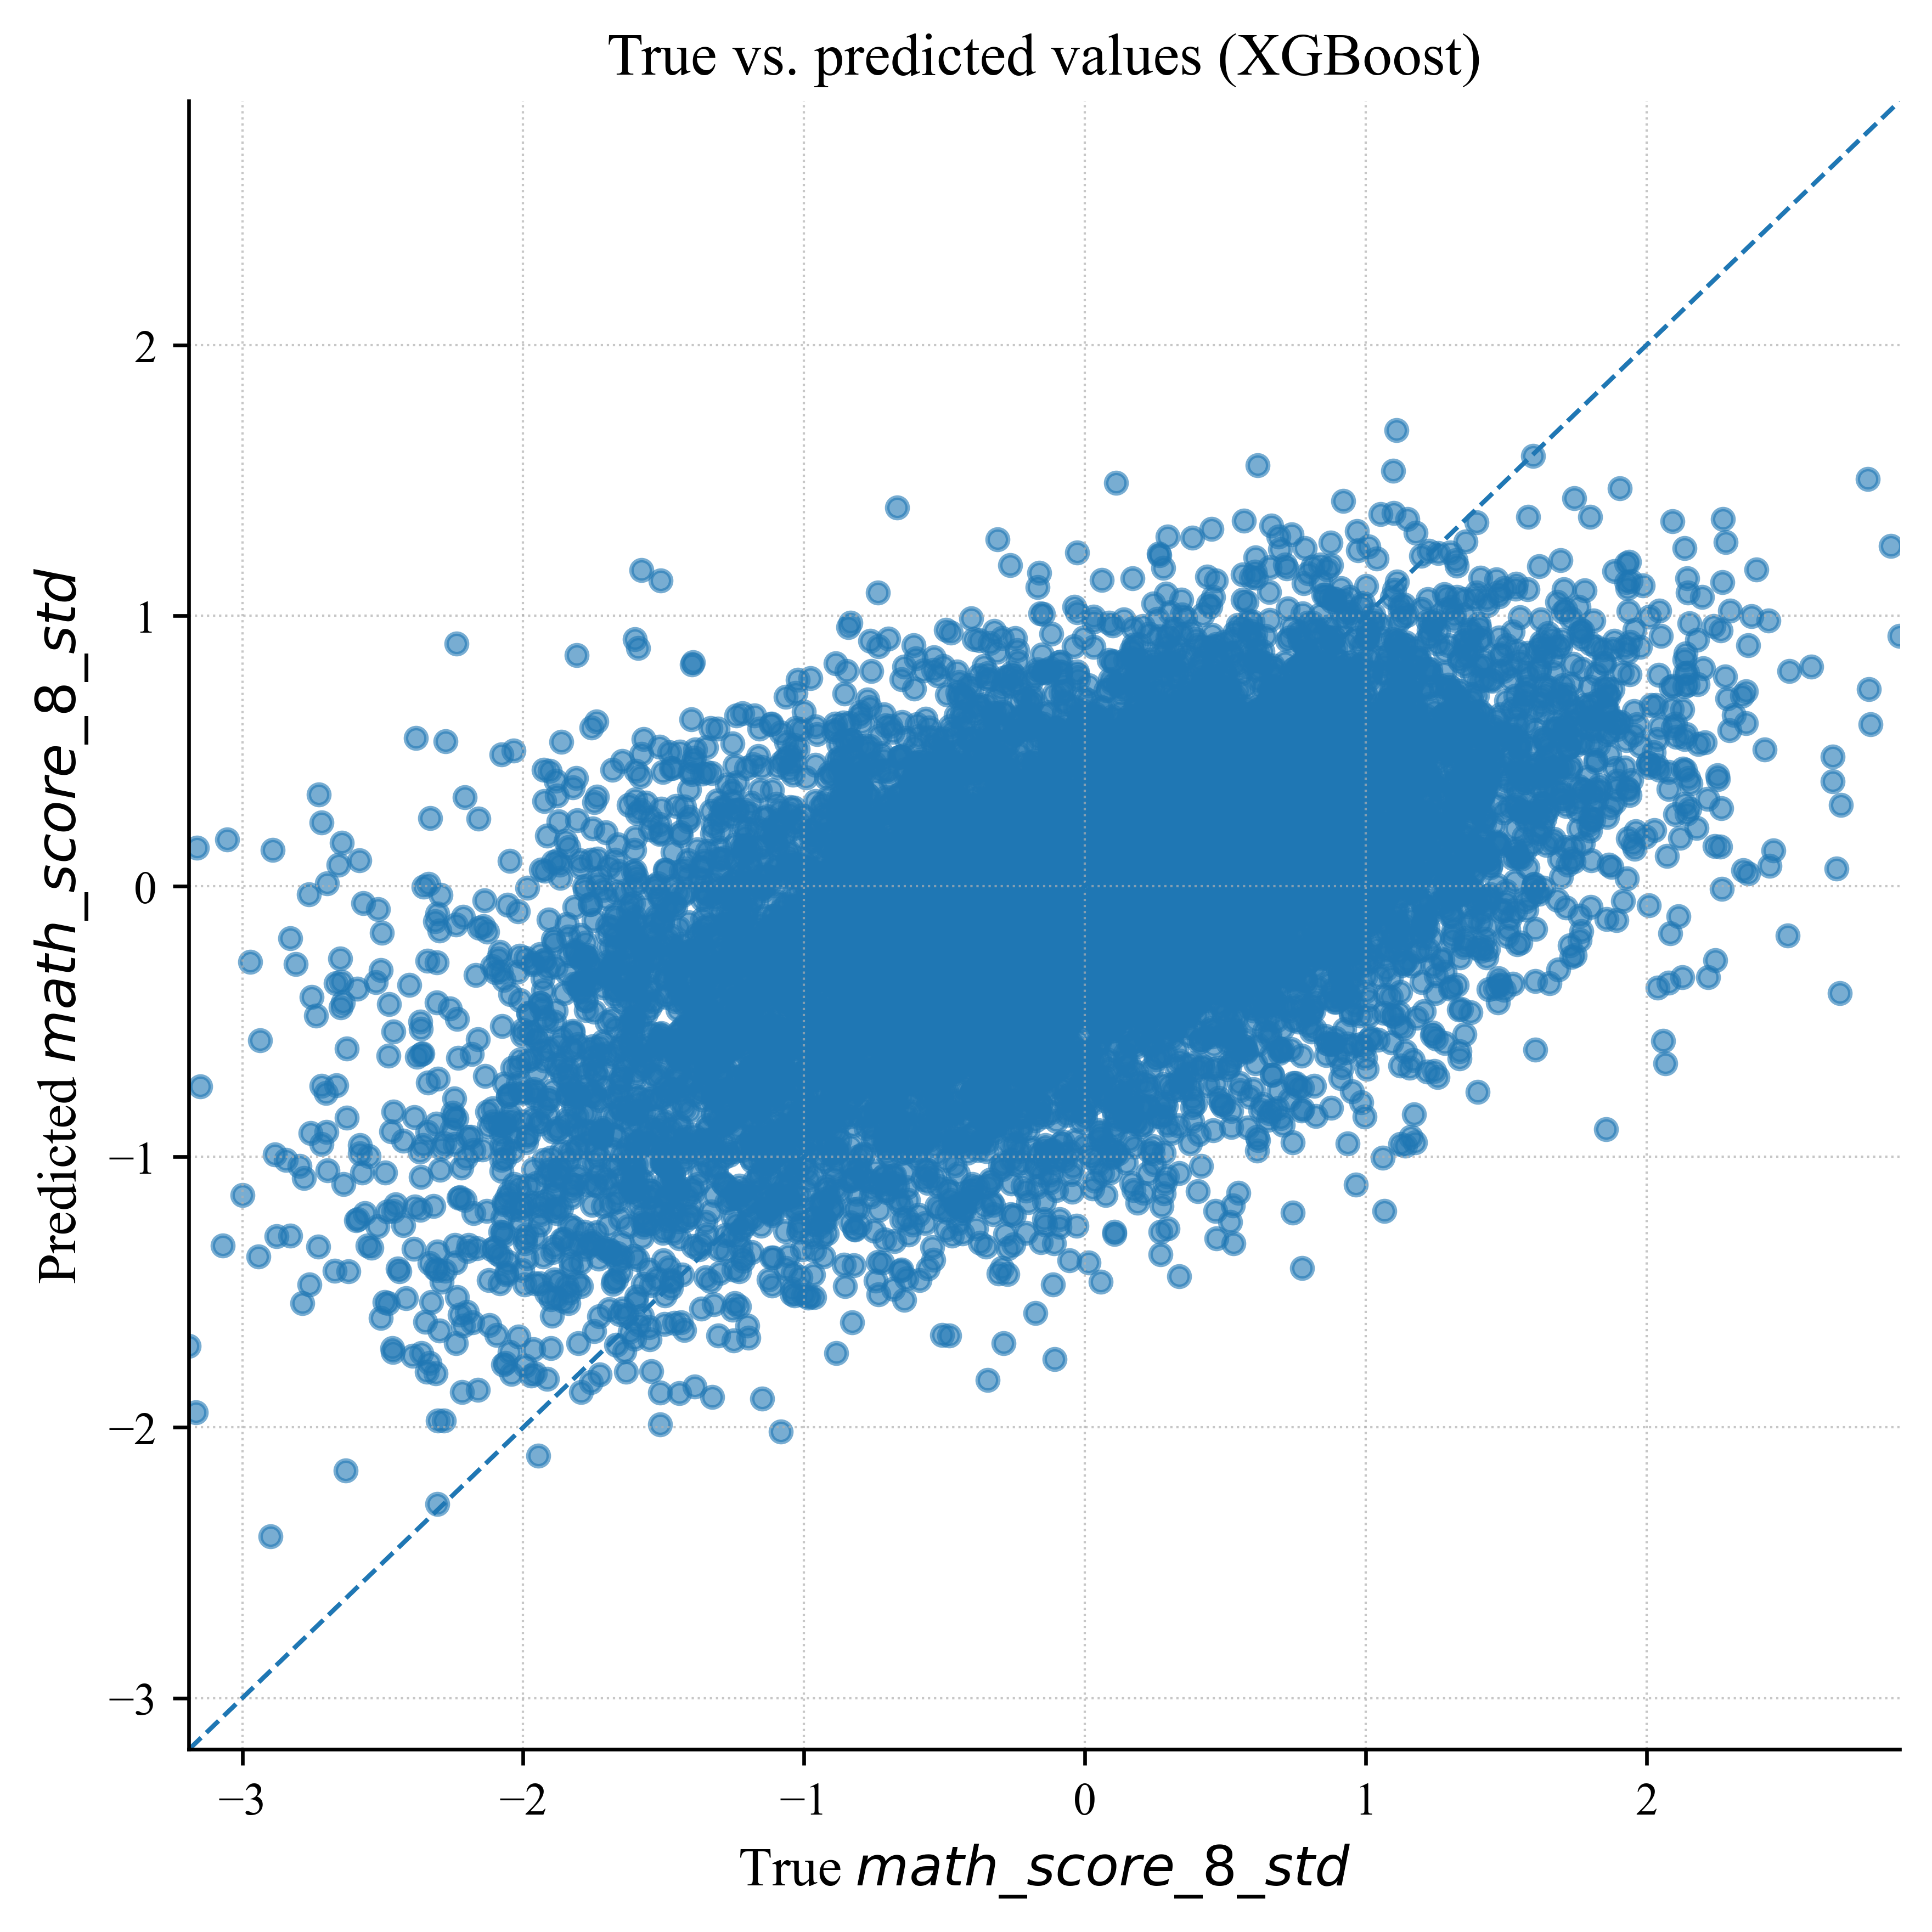

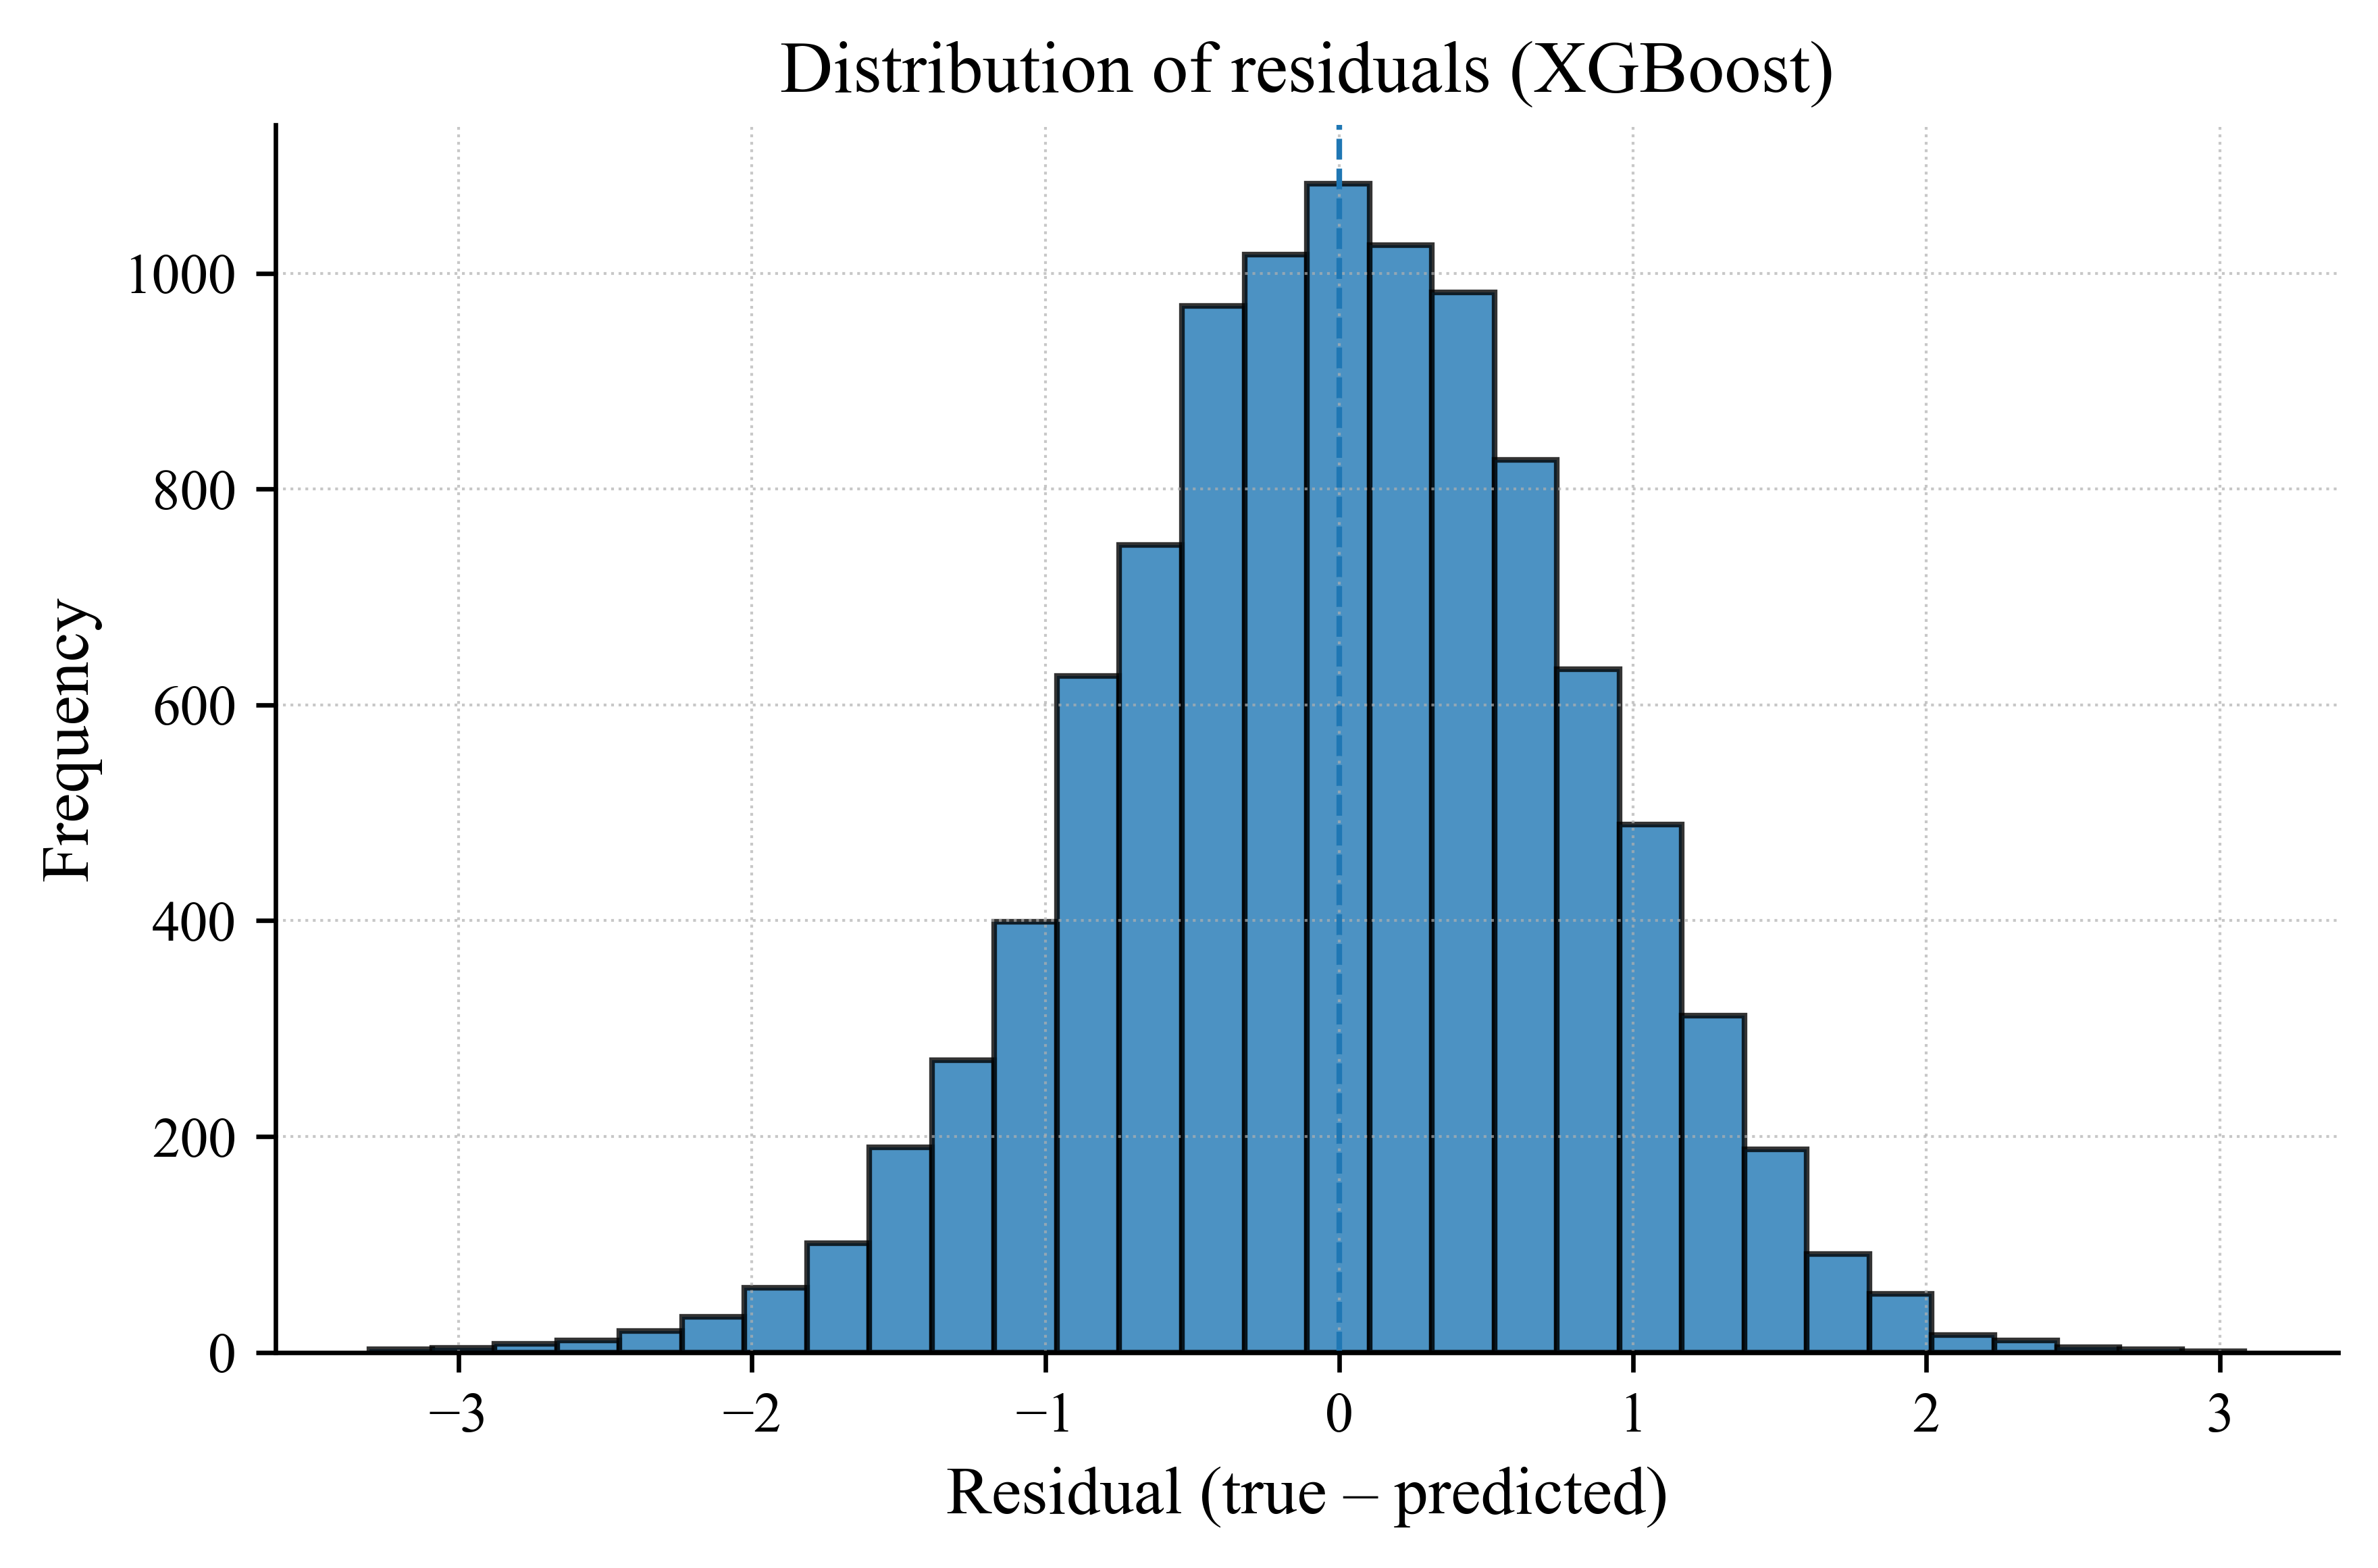

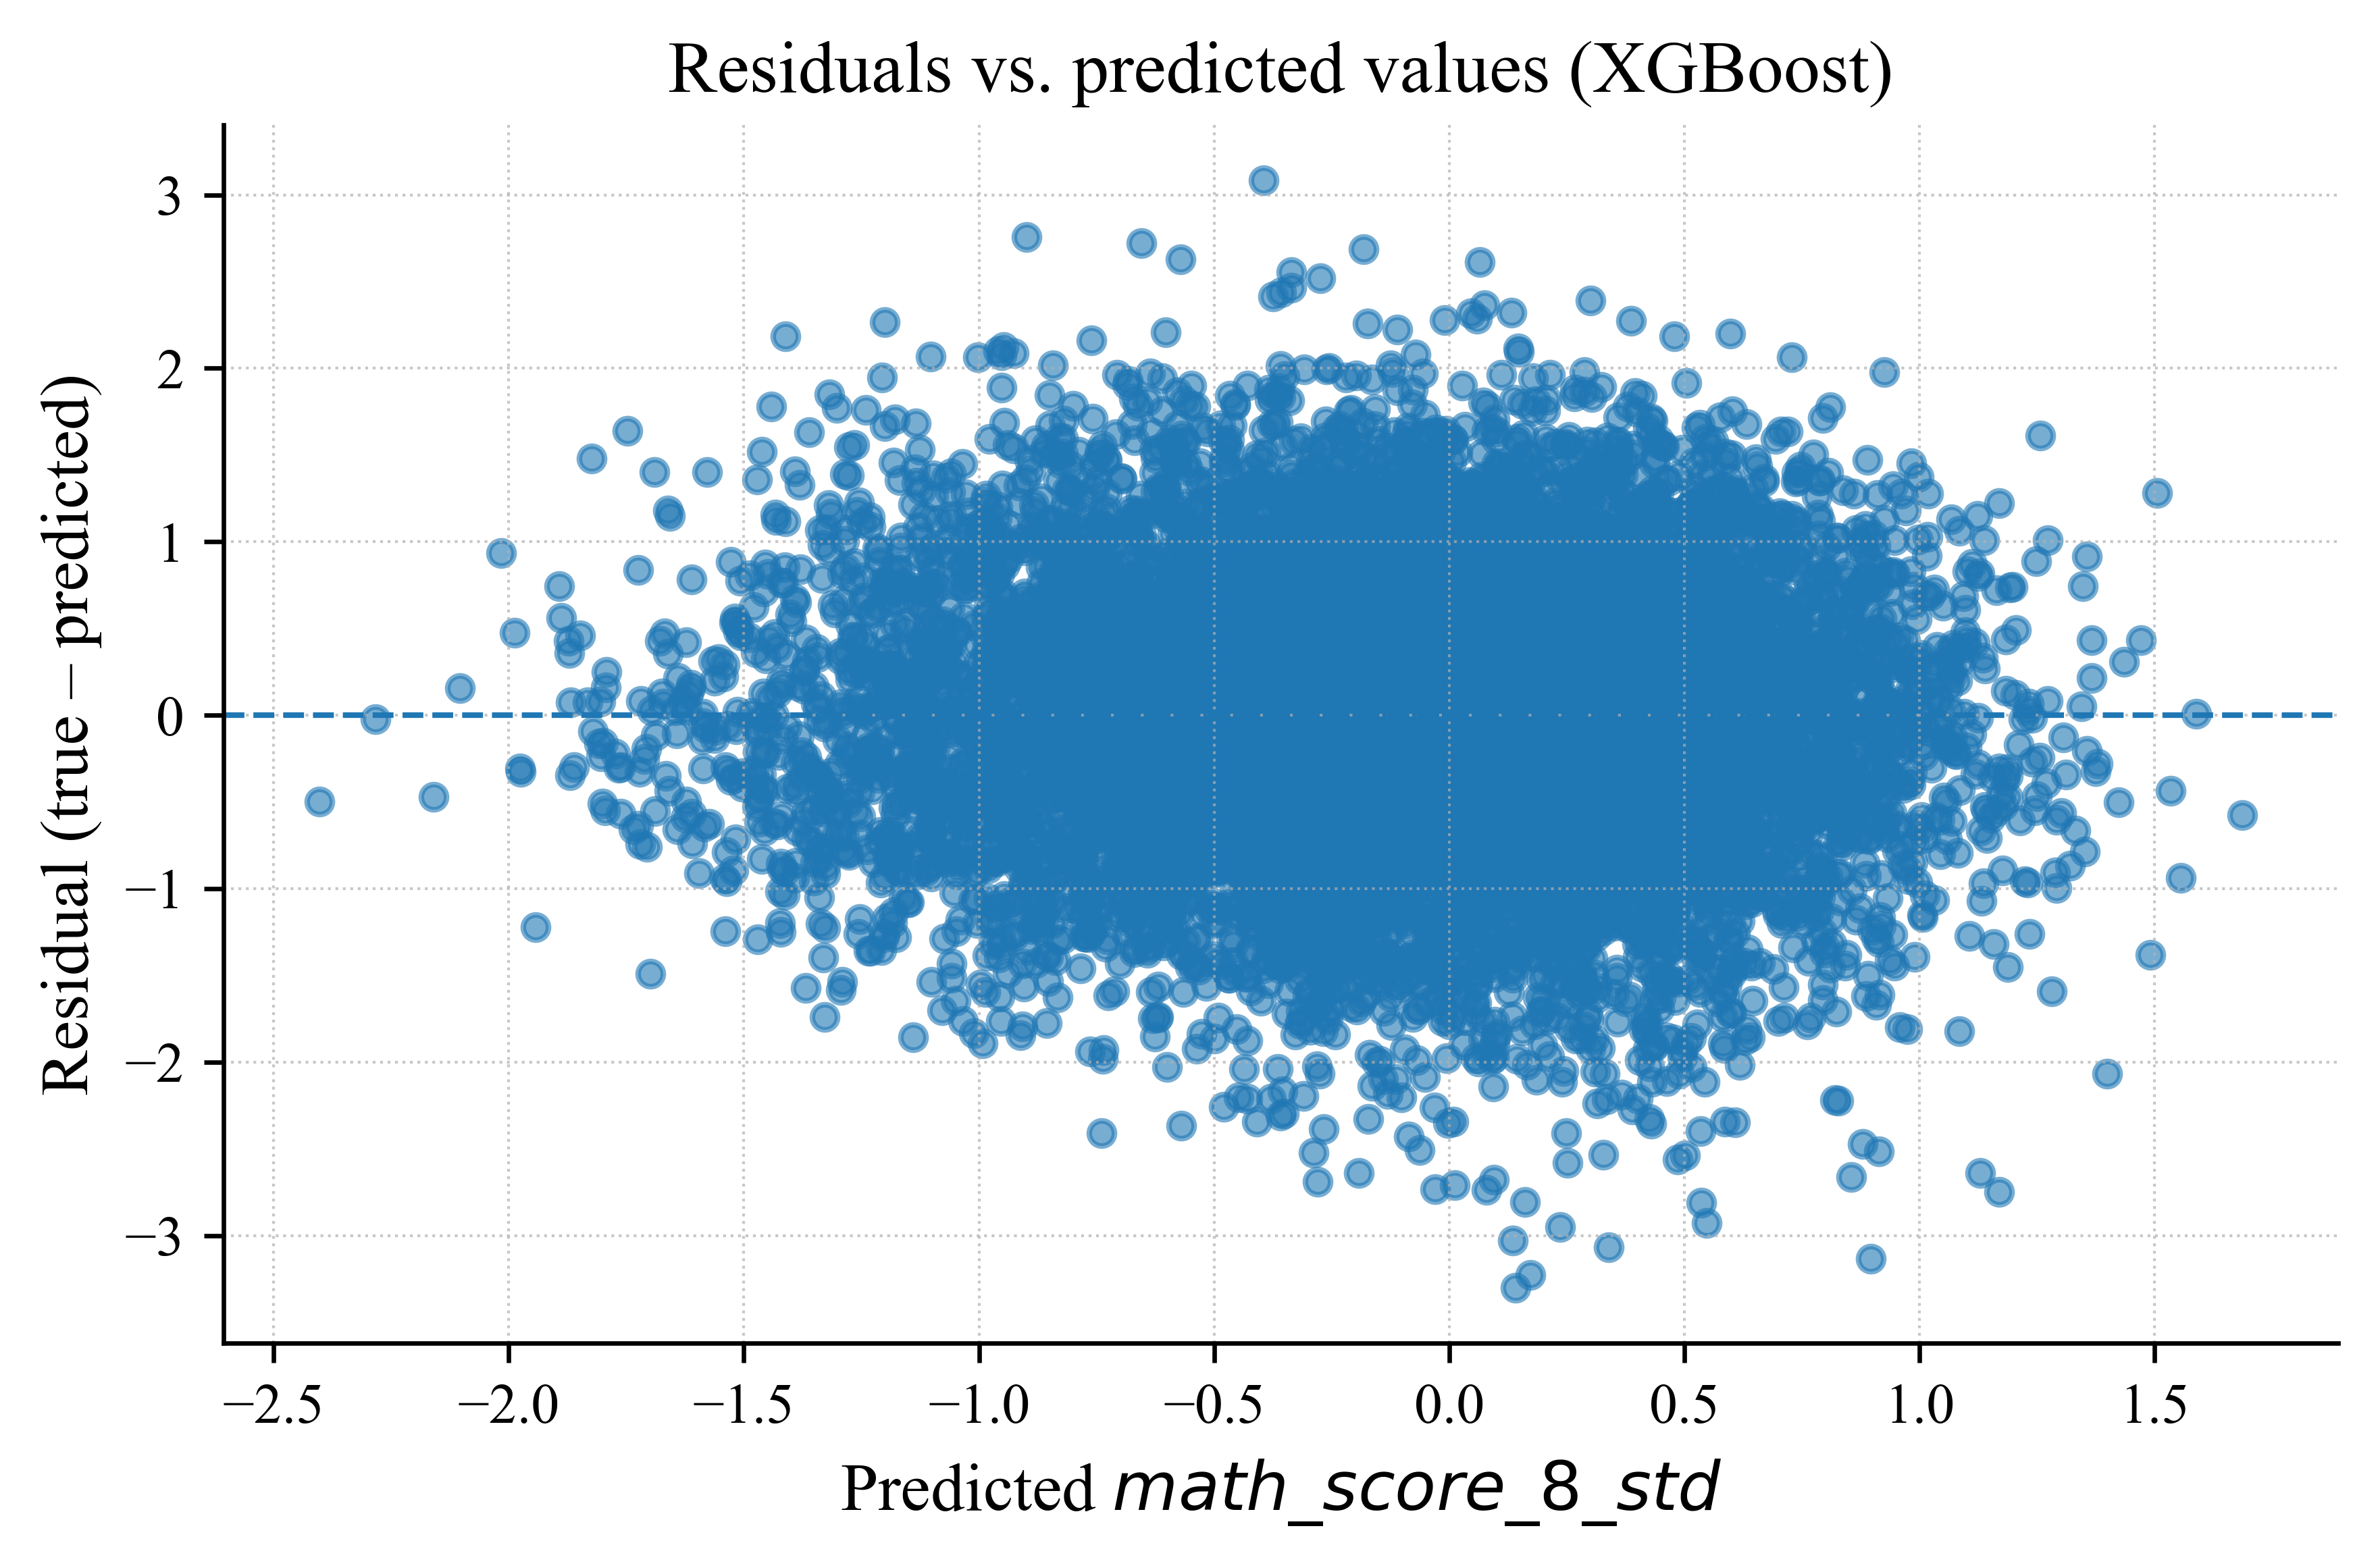

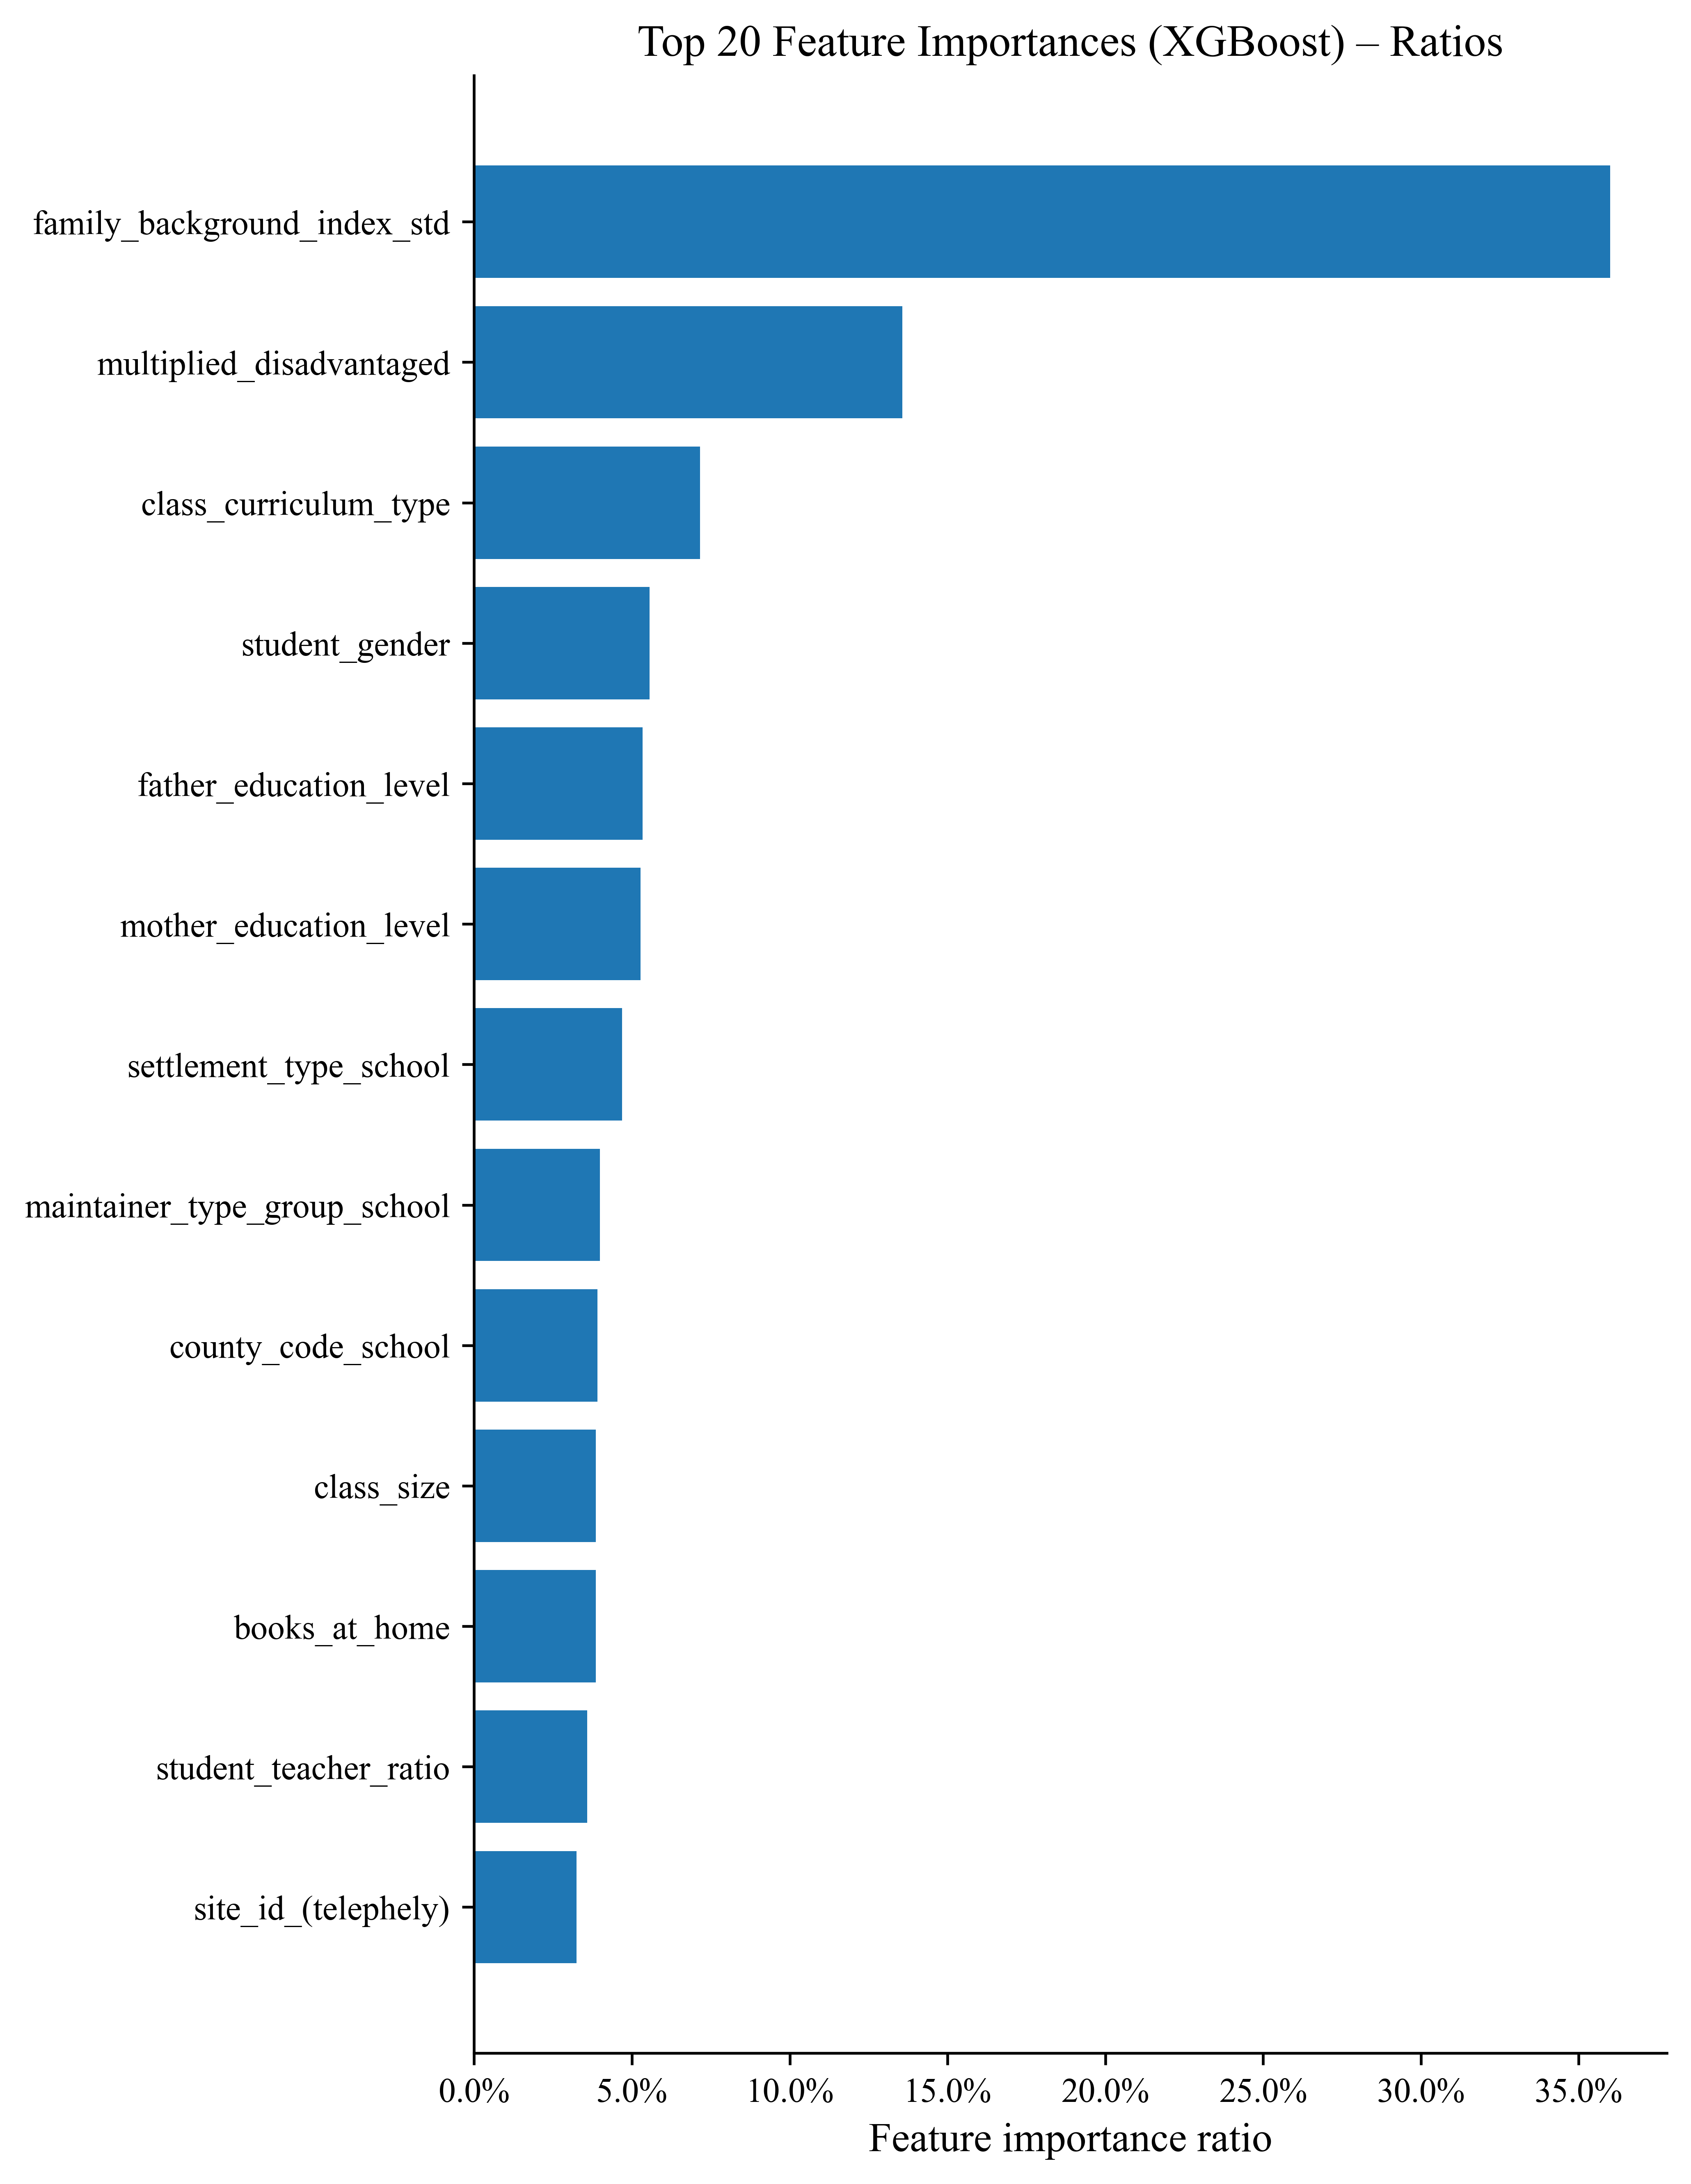

Elapsed time is 1192.951749 seconds.


In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --
# XGBoost
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ --

xgb = install_and_import("xgboost")
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
import matplotlib as mpl
import matplotlib.ticker as mtick
import os

np.random.seed(seed)

# Reload the same analysis dataset used in linear models
filtered_data_anal = pd.read_csv("../data/filtered_data_anal.csv")

# Features and target via shared helper
X_full, y_full = split_X_y(filtered_data_anal, target_col=target_col)

# XGBoost: allow categorical dtypes (object -> category)
X_xgb = X_full.copy()
cat_cols = X_xgb.select_dtypes(include=["object"]).columns
if len(cat_cols) > 0:
    X_xgb[cat_cols] = X_xgb[cat_cols].astype("category")

# Train/test split with the shared helper (same seed, same pattern)
X_train, X_test, y_train, y_test = simple_train_test_split(X_xgb, y_full)

print("Target:", target_col)
print("X_train shape for XGBoost:", X_train.shape)
print("X_test shape for XGBoost:", X_test.shape)

# Base XGBoost model
base_model = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    enable_categorical=True,
    random_state=seed,
)

# Hyperparameter search space (Randomized)
param_distributions = {
    "n_estimators":       [100, 200, 300, 500, 700],
    "learning_rate":      [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    "max_depth":          [3, 4, 5, 6, 7, 8, 10],
    "subsample":          [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree":   [0.6, 0.8, 1.0],
    "reg_lambda":         [0, 1, 2, 5, 10],             # L2
    "reg_alpha":          [0, 0.1, 0.25, 0.5, 0.75, 1], # L1
}

random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=seed,
)

# Fit hyperparameter search & evaluate model
random_search.fit(X_train, y_train)

# Best model after tuning
model = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

# Predictions on test set
y_pred = model.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE (XGBoost):", rmse)
print("R^2 (XGBoost):", r2)

# Plotting – same style as before
mpl.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.dpi": 600,
})


# Plot 1. True vs. predicted values
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_test, y_pred, s=20, alpha=0.6)
ax.set_xlabel("True $math\\_score\\_8\\_std$")
ax.set_ylabel("Predicted $math\\_score\\_8\\_std$")
ax.set_title("True vs. predicted values (XGBoost)")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val],
        linestyle="--", linewidth=1)

ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)

ax.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig('../figures/xgb_true_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

# Plot 2. Residuals histogram
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(residuals, bins=30, edgecolor="black", alpha=0.8)
ax.set_xlabel("Residual (true – predicted)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of residuals (XGBoost)")

ax.axvline(0, linestyle="--", linewidth=1)

ax.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig('../figures/xgb_residuals_histogram.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

# Plot 3. Residuals vs. fitted values
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(y_pred, residuals, s=20, alpha=0.6)
ax.axhline(0, linestyle="--", linewidth=1)

ax.set_xlabel("Predicted $math\\_score\\_8\\_std$")
ax.set_ylabel("Residual (true – predicted)")
ax.set_title("Residuals vs. predicted values (XGBoost)")

ax.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig('../figures/xgb_residuals_vs_fitted.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

# Plot 4. Feature importance (XGBoost) – ratios
booster = model.get_booster()
score_dict = booster.get_score(importance_type="gain")

imp_df = pd.DataFrame({
    "feature": list(score_dict.keys()),
    "importance": list(score_dict.values()),
})

imp_df["ratio"] = imp_df["importance"] / imp_df["importance"].sum()
imp_df = imp_df.sort_values("ratio", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(7, 9))

ax.barh(imp_df["feature"][::-1], imp_df["ratio"][::-1])

ax.set_title("Top 20 Feature Importances (XGBoost) – Ratios")
ax.set_xlabel("Feature importance ratio")

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

fig.tight_layout()
fig.savefig('../figures/xgb_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

#Time elapsed since t.tic()
t.toc()